<a href="https://colab.research.google.com/github/StoneAustin/Biomass-Scaling/blob/main/6_Creating_a_Correlation_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bm = '/content/drive/MyDrive/Colab Notebooks/Thesis Files/Plot Biomass Measures/biomass_measures.csv'


In [ ]:
bm1 = pd.read_csv(bm)
bm1.head()

,Date_x,Idkey_x,Field_Id_x,Site_ID,DryWeight_G,WetWeight_G,BagWeight_G,PWC,PD_m2,PWC_g_m2,PWC_PCT,wet_biomass_10_plants,dry_biomass_10_plants,Datetime,CropHeight_AVG_CM
0,2018169,102,1100,2,6.039,13.607,48.29,27.39,6.444201,17.650667,68.796992,136.07,60.39,2018-06-18,19.9
1,2018169,114,1100,14,7.067,20.080,49.32,80.81,4.923414,39.786105,46.653024,200.80,70.67,2018-06-18,23.6
2,2018169,128,1100,28,5.987,12.860,46.75,21.98,5.853392,12.865755,73.145999,128.60,59.87,2018-06-18,20.4
3,2018169,120,1102,20,5.375,11.035,50.15,6.45,6.487965,4.184737,89.285714,110.35,53.75,2018-06-18,13.5
4,2018169,132,1102,32,6.307,13.997,48.65,28.25,6.061269,17.123085,69.064827,139.97,63.07,2018-06-18,23.0


In [ ]:
import pandas as pd

# reshape the dataframe into a long format using melt()
melted_df = pd.melt(
    bm1,
    id_vars=["Site_ID", "Datetime"],
    value_vars=["DryWeight_G", "WetWeight_G", "PWC", "PD_m2", "PWC_g_m2", "PWC_PCT", "CropHeight_AVG_CM"],
    var_name="Measurement",
    value_name="Value"
)

# pivot the melted dataframe to get the desired shape
pivoted_df = pd.pivot_table(
    melted_df,
    index=["Site_ID", "Measurement"],
    columns=["Datetime"],
    values="Value"
)


# reset the index
pivoted_df = pivoted_df.reset_index()

# sort the pivoted dataframe by measurement
pivoted_df = pivoted_df.sort_values(by=["Measurement","Site_ID"])

pivoted_df = pivoted_df.rename(columns={'Site_ID': 'SampleID'})

pivoted_df.head()


Datetime,SampleID,Measurement,2018-06-18,2018-07-12,2018-08-03,2018-08-31,2018-09-21,2018-10-17
0,2,CropHeight_AVG_CM,19.9,70.6,108.8,141.8,139.1,113.666667
7,14,CropHeight_AVG_CM,23.6,83.1,129.1,146.4,142.6,113.000000
14,20,CropHeight_AVG_CM,13.5,67.6,100.0,122.3,121.8,104.300000
21,28,CropHeight_AVG_CM,20.4,70.2,105.3,115.4,111.1,97.300000
28,32,CropHeight_AVG_CM,23.0,72.9,100.2,111.7,111.9,93.100000


In [ ]:
# Initialize empty DataFrame
merged_df = pd.DataFrame()

# specify the directory containing the CSV files
csv_dir = "/content/drive/My Drive/Colab Notebooks/Thesis Files/Tables"


# Loop through each CSV file in directory and append to merged_df
for csv_file in os.listdir(csv_dir):
    if csv_file.endswith(".csv"):
        # Read CSV file into a DataFrame
        csv_path = os.path.join(csv_dir, csv_file)
        df = pd.read_csv(csv_path)

        # Extract measurement name from filename and add as a new column
        measurement = csv_file.split("_")[0]
        df.insert(0, "Measurement", measurement)

        # Append DataFrame to merged_df
        merged_df = merged_df.append(df, ignore_index=True)

merged_df.head()

<ipython-input-7-69c378ed36e5>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df, ignore_index=True)
<ipython-input-7-69c378ed36e5>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df, ignore_index=True)
<ipython-input-7-69c378ed36e5>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df, ignore_index=True)
<ipython-input-7-69c378ed36e5>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df, ignore_index=True)
<ipython-input-7-69c378ed36e5>:20: FutureWarning: The frame.append method is deprecated and will be removed from

,Measurement,SampleID,2018-06-18,2018-07-12,2018-07-24,2018-08-03,2018-08-31,2018-09-07,2018-09-21,2018-10-17
0,NDVI,2,0.354280,0.728635,0.884264,0.904630,0.926432,0.915663,0.855151,0.318395
1,NDVI,14,0.335437,0.779189,0.919113,0.917417,0.910981,0.899879,0.765813,0.311537
2,NDVI,20,0.302489,0.623061,0.875803,0.897008,0.917426,0.905776,0.761391,0.319257
3,NDVI,28,0.321293,0.617222,0.861713,0.913131,0.904794,0.881669,0.723062,0.291689
4,NDVI,32,0.497282,0.774668,0.914211,0.903662,0.891360,0.855348,0.660553,0.324350


In [ ]:
new_df = merged_df.append(melted_df, ignore_index=True)
new_df

<ipython-input-8-feef7d686279>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = merged_df.append(melted_df, ignore_index=True)


,Measurement,SampleID,2018-06-18,2018-07-12,2018-07-24,2018-08-03,2018-08-31,2018-09-07,2018-09-21,2018-10-17,Site_ID,Datetime,Value
0,NDVI,2.0,0.354280,0.728635,0.884264,0.904630,0.926432,0.915663,0.855151,0.318395,NaN,NaN,NaN
1,NDVI,14.0,0.335437,0.779189,0.919113,0.917417,0.910981,0.899879,0.765813,0.311537,NaN,NaN,NaN
2,NDVI,20.0,0.302489,0.623061,0.875803,0.897008,0.917426,0.905776,0.761391,0.319257,NaN,NaN,NaN
3,NDVI,28.0,0.321293,0.617222,0.861713,0.913131,0.904794,0.881669,0.723062,0.291689,NaN,NaN,NaN
4,NDVI,32.0,0.497282,0.774668,0.914211,0.903662,0.891360,0.855348,0.660553,0.324350,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,CropHeight_AVG_CM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,2018-10-17,113.0
320,CropHeight_AVG_CM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,2018-10-17,104.3
321,CropHeight_AVG_CM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,2018-10-17,97.3
322,CropHeight_AVG_CM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,2018-10-17,93.1


In [ ]:
# Concatenate dataframes vertically
df_concat = pd.concat([pivoted_df, merged_df], axis=0)

# Reset index
df_concat = df_concat.reset_index(drop=True)
df_concat

,SampleID,Measurement,2018-06-18,2018-07-12,2018-08-03,2018-08-31,2018-09-21,2018-10-17,2018-07-24,2018-09-07
0,2,CropHeight_AVG_CM,19.900000,70.600000,108.800000,141.800000,139.100000,113.666667,NaN,NaN
1,14,CropHeight_AVG_CM,23.600000,83.100000,129.100000,146.400000,142.600000,113.000000,NaN,NaN
2,20,CropHeight_AVG_CM,13.500000,67.600000,100.000000,122.300000,121.800000,104.300000,NaN,NaN
3,28,CropHeight_AVG_CM,20.400000,70.200000,105.300000,115.400000,111.100000,97.300000,NaN,NaN
4,32,CropHeight_AVG_CM,23.000000,72.900000,100.200000,111.700000,111.900000,93.100000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
109,14,VARI,-0.036347,0.307945,0.631414,0.615074,0.174626,-0.240790,0.665482,0.516476
110,20,VARI,-0.171820,0.111442,0.502850,0.632353,0.235302,-0.249889,0.524206,0.542654
111,28,VARI,-0.067315,0.109353,0.587118,0.573225,0.117544,-0.200594,0.473713,0.442400
112,32,VARI,0.117531,0.316107,0.515964,0.530613,0.054433,-0.203156,0.591651,0.378504


In [ ]:
import numpy as np

# select the columns you want to use
selected_cols = ['SampleID', 'Measurement', '2018-06-18', '2018-07-12', '2018-08-03', '2018-08-31', '2018-09-21', '2018-10-17', '2018-07-24', '2018-09-07']

# filter the dataframe to keep only the selected columns
df_selected = df_concat[selected_cols]

# melt the dataframe to transform the date columns into rows
melted_df = df_selected.melt(id_vars=['SampleID', 'Measurement'], var_name='Date', value_name='Value')

# pivot the resulting melted dataframe
corr_df = pd.pivot_table(melted_df, index=["SampleID", "Date"], columns="Measurement", values="Value")

corr_df.dropna(inplace=True)

# create a list of the column names in the desired order
new_order = ['CropHeight_AVG_CM', 'DryWeight_G', 'WetWeight_G', 'PD_m2','PWC','PWC_PCT','PWC_g_m2','NDVI','NDRE','SAVI','MSAVI','GNDVI','GLI','CGI','CI','EVI2','OSAVI','NDWI','VARI']

# use reindex to rearrange the columns
corr_df = corr_df.reindex(columns=new_order)

corr_df.head()


Measurement          CropHeight_AVG_CM  DryWeight_G  WetWeight_G     PD_m2  \
SampleID Date                                                                
2        2018-06-18          19.900000        6.039       13.607  6.444201   
         2018-07-12          70.600000       60.700      179.100  6.444201   
         2018-08-03         108.800000       87.600      464.100  6.444201   
         2018-08-31         141.800000      137.300      623.200  6.444201   
         2018-09-21         139.100000      130.500      424.400  6.444201   
         2018-10-17         113.666667      129.300      264.000  6.444201   
14       2018-06-18          23.600000        7.067       20.080  4.923414   
         2018-07-12          83.100000       73.700      227.600  4.923414   
         2018-08-03         129.100000       92.500      441.600  4.923414   
         2018-08-31         146.400000      184.200      676.000  4.923414   
         2018-09-21         142.600000      135.900      368.900  4.923414   
         2018-10-17         113.000000      119.900      241.900  4.923414   
20       2018-06-18          13.500000        5.375       11.035  6.487965   
         2018-07-12          67.600000       51.800      100.300  6.487965   
         2018-08-03         100.000000       59.800      301.000  5.853392   
         2018-08-31         122.300000      152.700      596.500  5.853392   
         2018-09-21         121.800000      161.700      431.300  5.853392   
         2018-10-17         104.300000      120.800      243.200  5.853392   
28       2018-06-18          20.400000        5.987       12.860  5.853392   
         2018-07-12          70.200000       60.100      169.700  5.853392   
         2018-08-03         105.300000       74.300      357.400  6.487965   
         2018-08-31         115.400000      113.900      461.600  6.487965   
         2018-09-21         111.100000      160.500      473.700  6.487965   
         2018-10-17          97.300000      116.600      210.200  6.487965   
32       2018-06-18          23.000000        6.307       13.997  6.061269   
         2018-07-12          72.900000       59.700      179.500  6.061269   
         2018-08-03         100.200000       78.300      353.300  6.061269   
         2018-08-31         111.700000      150.500      580.600  6.061269   
         2018-09-21         111.900000      102.700      335.800  6.061269   
         2018-10-17          93.100000      106.100      157.400  6.061269   
39       2018-06-18          18.300000        6.053       13.747  5.371991   
         2018-07-12          72.700000       59.100      169.800  5.371991   
         2018-08-03         103.500000       81.500      397.500  5.371991   
         2018-08-31         120.700000      127.200      514.000  5.371991   
         2018-09-21         114.700000      235.100      644.500  5.371991   
         2018-10-17          97.900000      157.700      308.000  5.371991   

Measurement              PWC    PWC_PCT     PWC_g_m2      NDVI      NDRE  \
SampleID Date                                                              
2        2018-06-18    27.39  68.796992    17.650667  0.354280  0.148484   
         2018-07-12   865.00  41.236413   557.423414  0.728635  0.387407   
         2018-08-03  3765.00  18.875242  2426.241794  0.904630  0.501160   
         2018-08-31  4859.00  22.031451  3131.237418  0.926432  0.526852   
         2018-09-21  2939.00  30.749293  1893.950766  0.855151  0.401344   
         2018-10-17  1347.00  48.977273   868.033917  0.318395  0.197972   
14       2018-06-18    80.81  46.653024    39.786105  0.335437  0.131828   
         2018-07-12  1220.00  37.659683   600.656455  0.779189  0.415681   
         2018-08-03  3491.00  20.946558  1718.763676  0.917417  0.488245   
         2018-08-31  4918.00  27.248521  2421.334792  0.910981  0.447864   
         2018-09-21  2330.00  36.839252  1147.155361  0.765813  0.326442   
         2018-10-17  1220.00  49.565936   600.6

In [ ]:
#This code block averages each observation by date 

# Select the columns you want to use
selected_cols2 = ['Measurement', '2018-06-18', '2018-07-12', '2018-08-03', '2018-08-31', '2018-09-21', '2018-10-17', '2018-07-24', '2018-09-07']

# Filter the dataframe to keep only the selected columns
df_selected2 = df_concat[selected_cols2]

# Melt the dataframe to transform the date columns into rows
melted_df2 = df_selected2.melt(id_vars='Measurement', var_name='Date', value_name='Value')

# Group by date and measurement, and calculate the average value
corr_df2 = melted_df2.groupby(['Date', 'Measurement'])['Value'].mean().reset_index()

# Pivot the resulting dataframe
corr_df2 = corr_df2.pivot(index='Date', columns='Measurement', values='Value')

# Create a list of the column names in the desired order
new_order2 = ['CropHeight_AVG_CM', 'DryWeight_G', 'WetWeight_G', 'PD_m2', 'PWC', 'PWC_PCT', 'PWC_g_m2', 'NDVI', 'NDRE', 'SAVI', 'MSAVI', 'GNDVI', 'GLI', 'CGI', 'CI', 'EVI2', 'OSAVI', 'NDWI', 'VARI']

# Use reindex to rearrange the columns
corr_df2 = corr_df2.reindex(columns=new_order2)

corr_df2.dropna(inplace=True)

corr_df2

Measurement,CropHeight_AVG_CM,DryWeight_G,WetWeight_G,PD_m2,PWC,PWC_PCT,PWC_g_m2,NDVI,NDRE,SAVI,MSAVI,GNDVI,GLI,CGI,CI,EVI2,OSAVI,NDWI,VARI
Date,,,,,,,,,,,,,,,,,,,
2018-06-18,19.783333,6.138000,14.221000,5.857039,31.941667,69.380363,17.665195,0.359199,0.154988,0.238110,0.218632,0.387253,0.088653,1.317797,-0.255691,0.228509,-0.254491,-0.387253,-0.034574
2018-07-12,72.850000,60.850000,171.000000,5.857039,782.500000,46.924220,446.114515,0.702685,0.371270,0.550386,0.572785,0.644946,0.240781,4.061956,-0.206192,0.583559,-0.543109,-0.644946,0.209807
2018-08-03,107.816667,79.000000,385.816667,5.857039,3068.166667,20.523926,1792.997447,0.906969,0.517606,0.630532,0.680250,0.803990,0.395363,8.344984,-0.013804,0.683148,-0.651565,-0.803990,0.552384
2018-08-31,126.383333,144.300000,575.316667,5.857039,4310.166667,25.037148,2515.168490,0.909299,0.474196,0.740664,0.817286,0.786121,0.446326,7.479707,-0.023153,0.830479,-0.715270,-0.786121,0.596728
2018-09-21,123.533333,154.400000,446.433333,5.857039,2920.333333,34.337271,1710.564369,0.754507,0.338872,0.535095,0.550263,0.701287,0.230820,4.934577,-0.205348,0.558478,-0.554856,-0.701287,0.195552
2018-10-17,103.211111,125.066667,237.450000,5.857039,1123.833333,53.715736,651.795405,0.315352,0.192906,0.201692,0.179943,0.440663,-0.029555,1.611940,-0.267874,0.189686,-0.219450,-0.440663,-0.218426


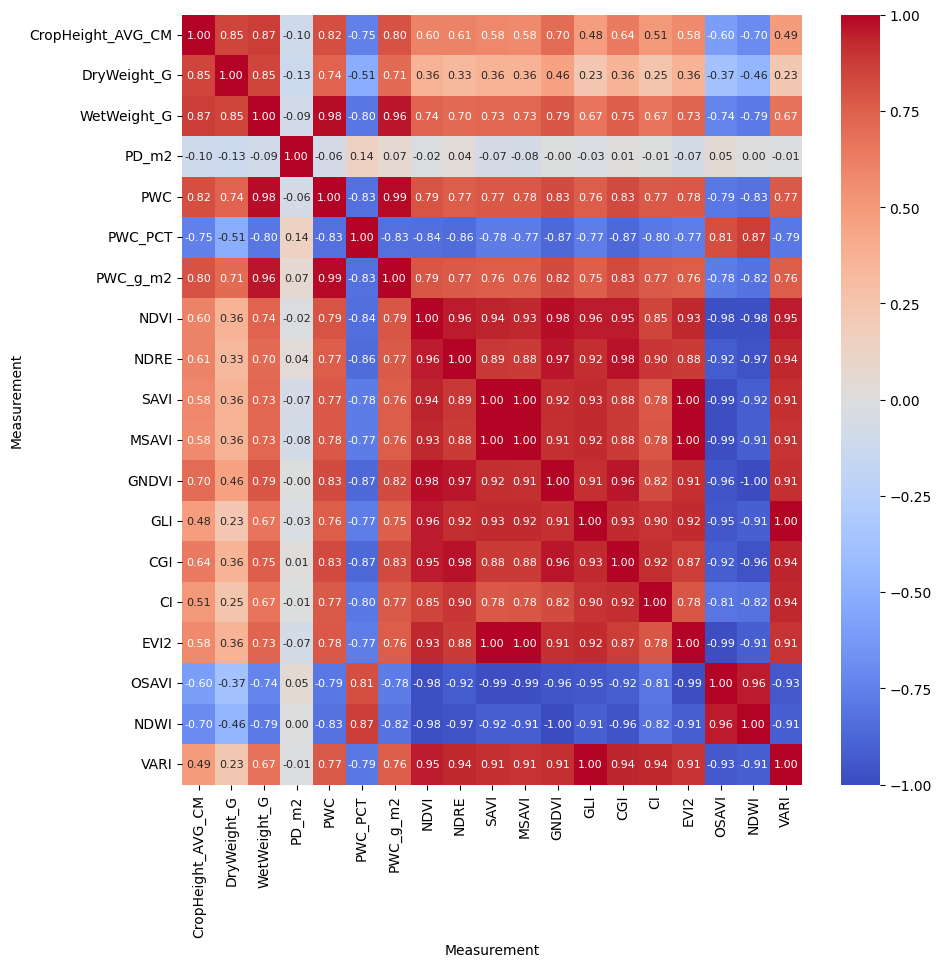

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
fig, ax = plt.subplots(figsize=(10,10))

# Create heatmap
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', ax=ax, annot_kws={'size': 8})

# Display plot
plt.show()



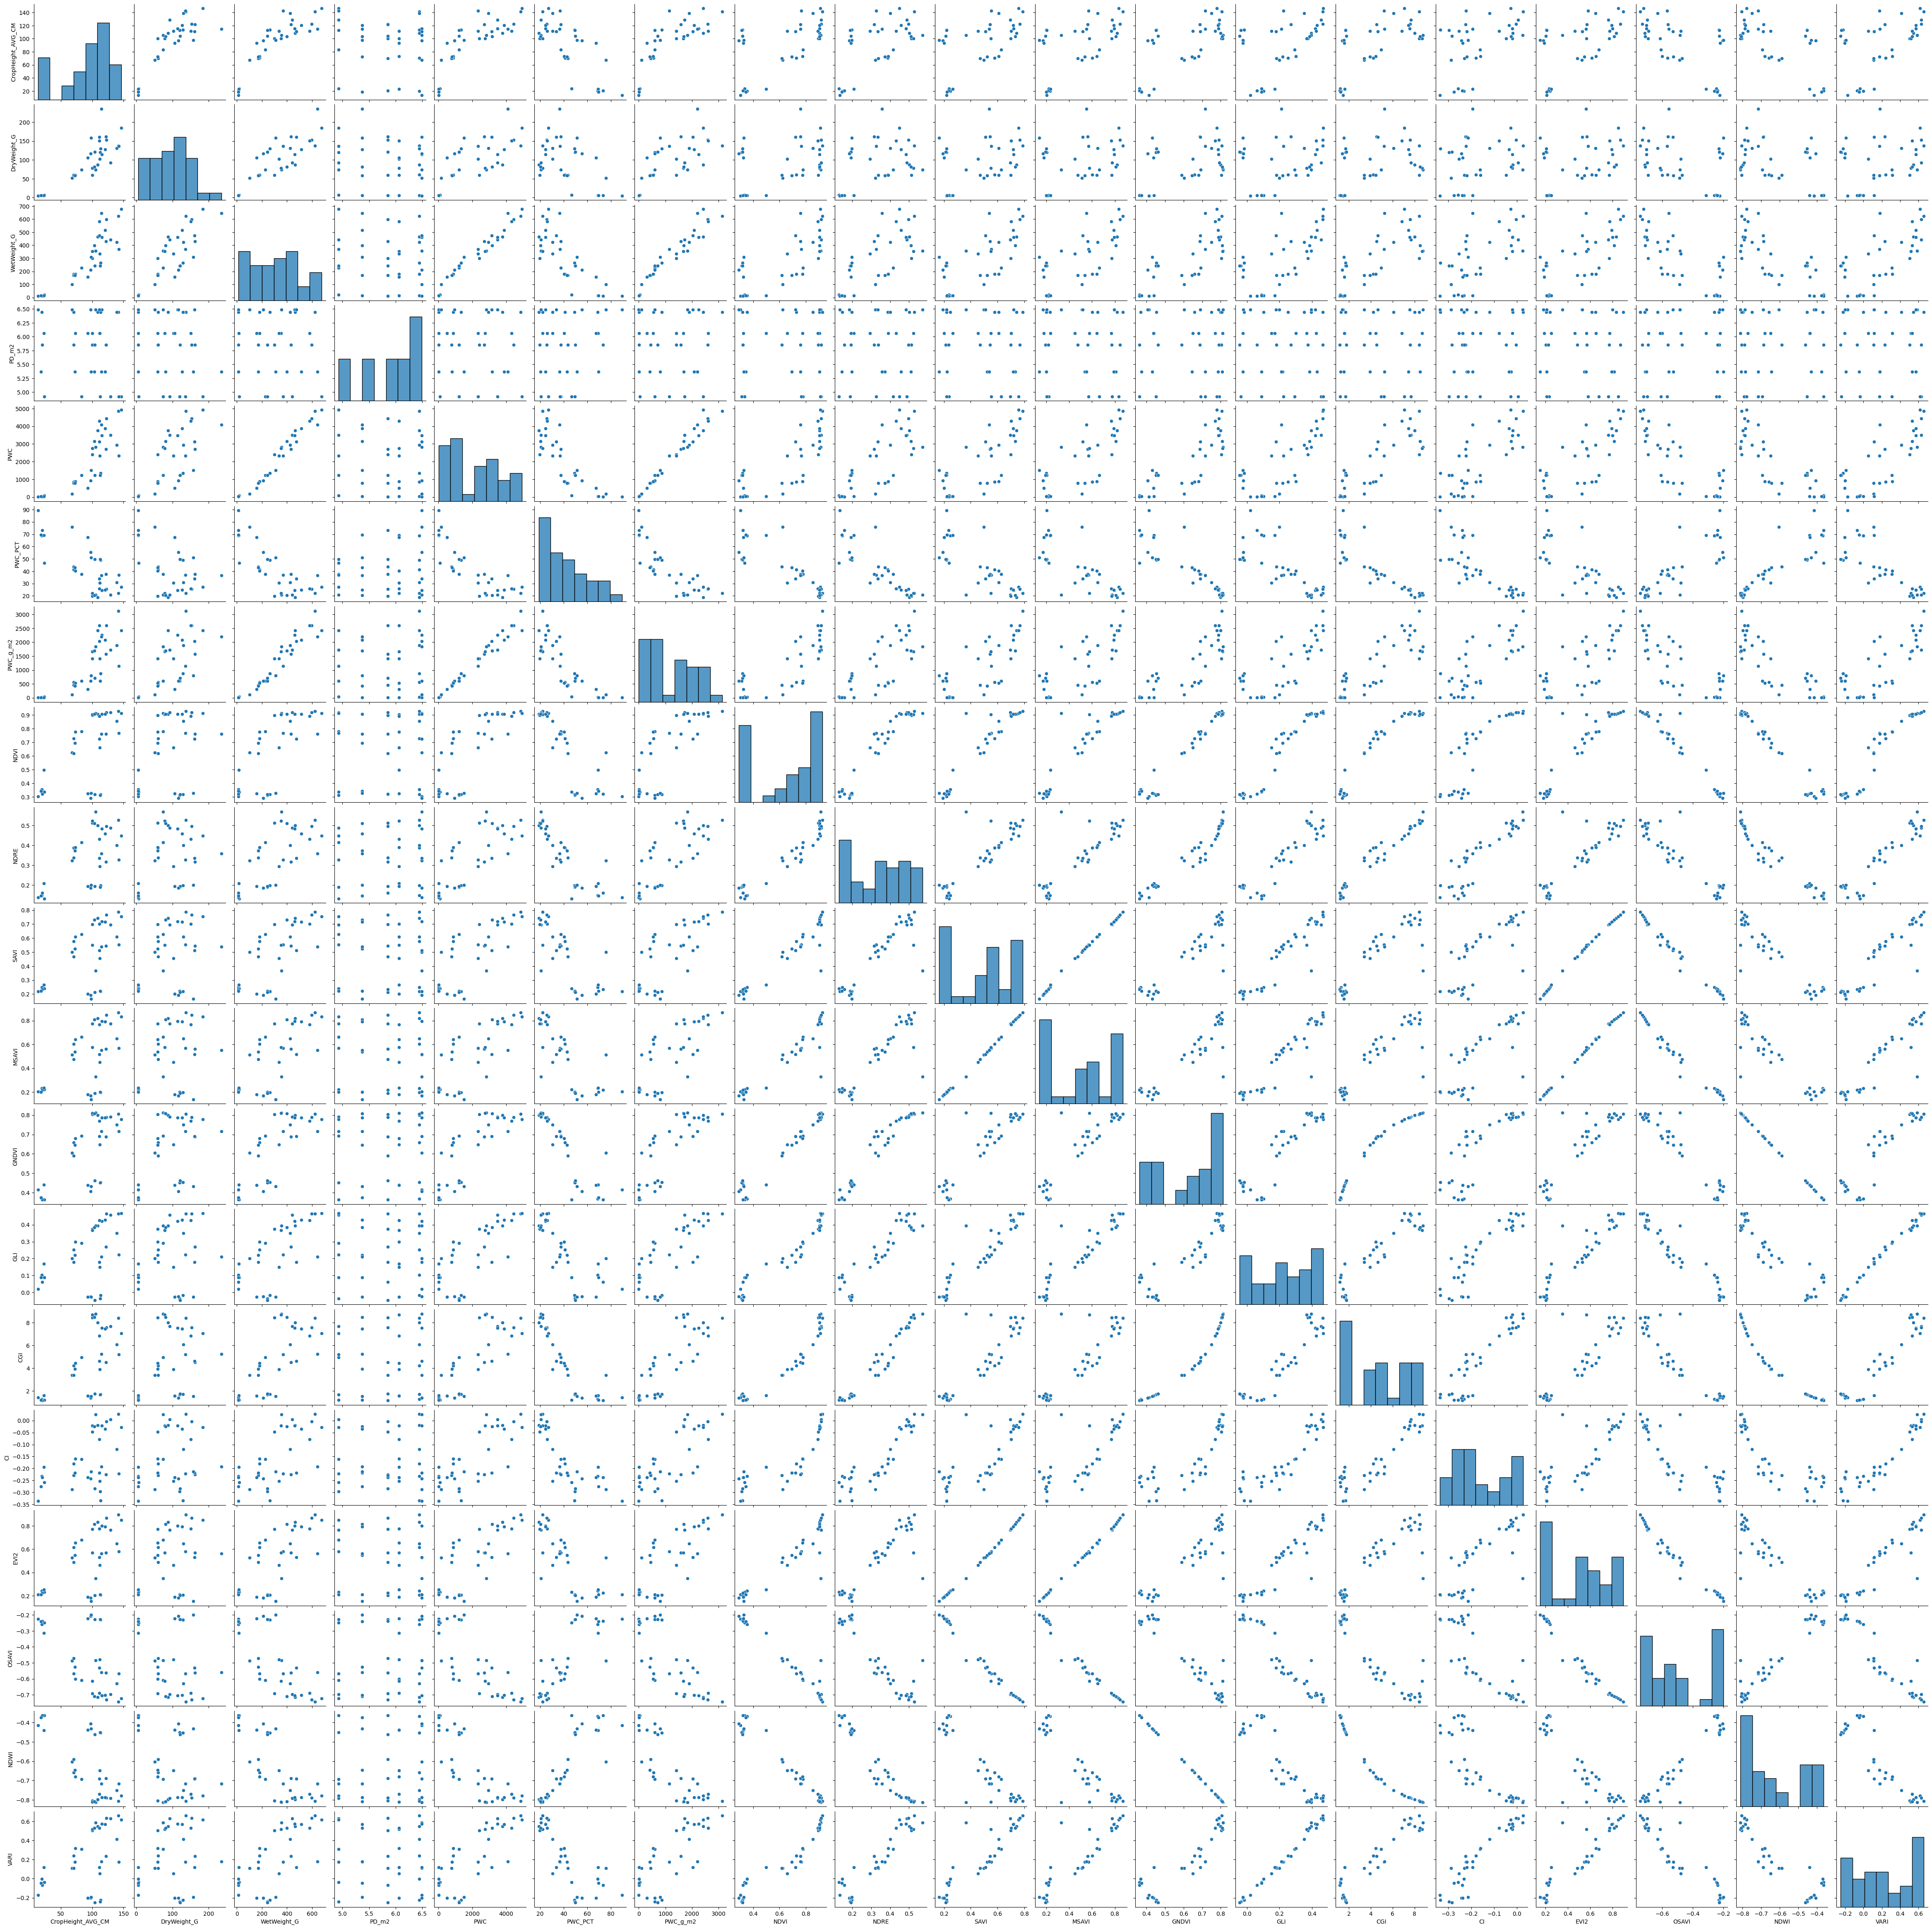

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(corr_df)

# Display plot
plt.show()



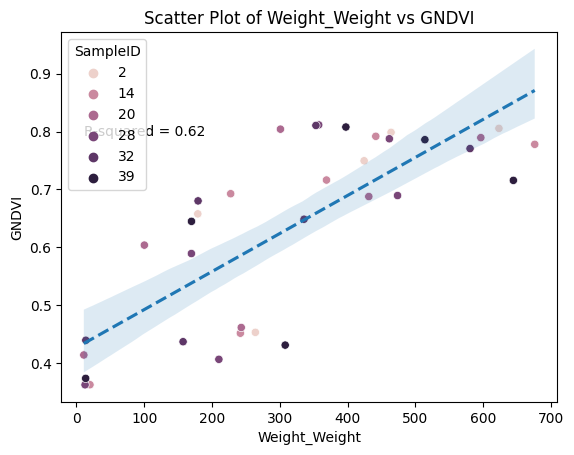

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# create the scatter plot with trendline
sns.scatterplot(x='WetWeight_G', y='GNDVI', data=corr_df, hue="SampleID")
sns.regplot(x='WetWeight_G', y='GNDVI', data=corr_df, scatter=False, line_kws={'linestyle': 'dashed'})

# calculate and display the R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(corr_df['WetWeight_G'], corr_df['GNDVI'])
plt.text(corr_df['WetWeight_G'].min(), corr_df['GNDVI'].max(), f'R-squared = {r_value**2:.2f}', ha='left', va='top')

# set axis labels and title
plt.xlabel('Weight_Weight')
plt.ylabel('GNDVI')
plt.title('Scatter Plot of Weight_Weight vs GNDVI')

# show the plot
plt.show()


Coefficients: [[1.70085511e-01]
 [7.81065241e+00]
 [6.56300914e-04]]
Intercept: [  40.38014475 -343.06809655    0.42717886]


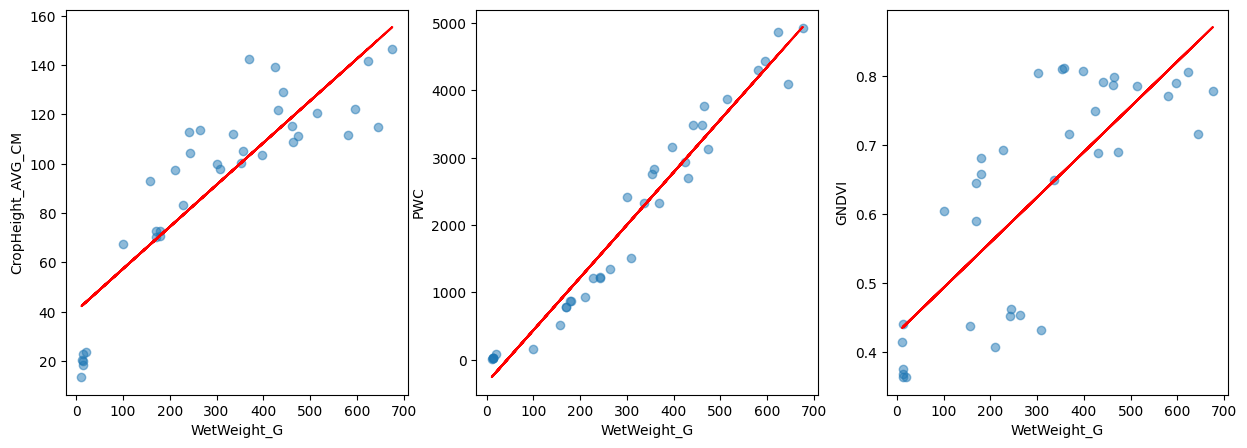

Predicted values: [[5.73886959e+01 4.37997145e+02 4.92808949e-01]
 [7.43972470e+01 1.21906239e+03 5.58439041e-01]
 [9.14057981e+01 2.00012763e+03 6.24069132e-01]]


In [ ]:
# Import required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression

# Extract the independent and dependent variables
X = corr_df[['WetWeight_G']]
y = corr_df[['CropHeight_AVG_CM', "PWC","GNDVI"]]

# Create a linear regression object and fit the model
reg = LinearRegression().fit(X, y)

# Print the coefficients and intercept of the regression model
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

# Use the model to make predictions on new data
X_new = pd.DataFrame({'WetWeight_G': [100, 200, 300]})
y_pred = reg.predict(X_new)

# Plot the regression line on each scatter plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(y.columns):
    axs[i].scatter(X, y[col], alpha=0.5)
    axs[i].plot(X, reg.predict(X)[:, i], color='red')
    axs[i].set_xlabel('WetWeight_G')
    axs[i].set_ylabel(col)
plt.show()

# Print the predicted values
print("Predicted values:", y_pred)
